## Cotton Disease Prediction

### import the libraries 

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

### import the dataset

Dataset link : https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbkNteXFYS3ZDRWJNUW1LMlkzZV9xV090OTRwUXxBQ3Jtc0ttbmVHRzRZMW5jc1BSTTNBZU8tOTRfd0lNb004SFRJaFJvLTlJV2Y2cmZoZnBmWXhNMG1ZUEE5NEVSMERsT3dwYjhnUFlfMUt1VHFudXdaQ1NsQ3dGeXJ6WXFIOHVZdFVKZjdGMEh0Z1BBZzBlcjF4cw&q=https%3A%2F%2Fdrive.google.com%2Fdrive%2Ffolders%2F1vdr9CC9ChYVW2iXp6PlfyMOGD-4Um1ue

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'E:\\cotton_dataset\\train'
valid_path = 'E:\\cotton_dataset\\test'

### Import the Vgg 16 library

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234553344/234545216 [==============================] - 45s 0us/step


In [5]:

# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [10]:
# useful for getting number of output classes
folders = glob('E:\\cotton_dataset\\train\\*')


In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)


In [11]:

# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

conv4_block34_1_bn (BatchNormal (None, 14, 14, 256)  1024        conv4_block34_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block34_1_relu (Activatio (None, 14, 14, 256)  0           conv4_block34_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block34_2_pad (ZeroPaddin (None, 16, 16, 256)  0           conv4_block34_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block34_2_conv (Conv2D)   (None, 14, 14, 256)  589824      conv4_block34_2_pad[0][0]        
__________________________________________________________________________________________________
conv4_block34_2_bn (BatchNormal (None, 14, 14, 256)  1024        conv4_block34_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_bloc

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('E:\\cotton_dataset\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [16]:

test_set = test_datagen.flow_from_directory('E:\\cotton_dataset\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


### fit the model

In [17]:

# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 416s 7s/step - loss: 1.3589 - accuracy: 0.8139 - val_loss: 0.4324 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 404s 7s/step - loss: 0.5056 - accuracy: 0.9257 - val_loss: 9.4494e-04 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 402s 7s/step - loss: 0.4053 - accuracy: 0.9395 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 403s 7s/step - loss: 0.3573 - accuracy: 0.9498 - val_loss: 6.7217e-06 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 401s 7s/step - loss: 0.4145 - accuracy: 0.9462 - val_loss: 3.9736e-08 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 400s 7s/step - loss: 0.3561 - accuracy: 0.9580 - val_loss: 1.7219e-07 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 403s 7s/st

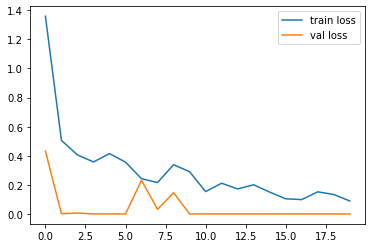

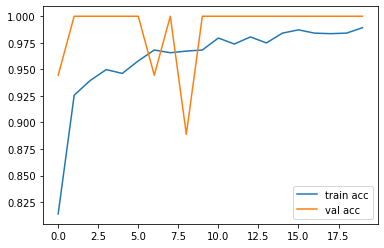

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt


# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [20]:

y_pred = model.predict(test_set)

In [21]:
y_pred

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.27335146e-11, 2.16484786e-08, 1.08250693e-10, 1.00000000e+00],
       [4.61253361e-24, 1.00000000e+00, 0.00000000e+00, 4.07729032e-32],
       [1.13435023e-16, 3.19787534e-12, 1.00000000e+00, 6.11592323e-19],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.88063858e-18, 6.93193105e-22, 2.03120422e-24, 1.00000000e+00],
       [6.86225672e-31, 2.07482956e-27, 7.05499134e-30, 1.00000000e+00],
       [1.00000000e+00, 3.50632332e-34, 1.70739065e-21, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.47395443e-19, 1.17710847e-34, 1.00000000e+00, 1.68700641e-25],
       [4.61349918e-25, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.89830174e-21, 0.00000000e+00, 1.00000000e+00],
       [1.20144203e-20, 1.00000000e+00, 7.03823013e-19, 1.20723411e-22],
       [1.22190479e-26, 1.00000000e+00, 0.00000000e

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


y_pred

array([0, 3, 1, 2, 0, 3, 3, 0, 1, 2, 2, 3, 1, 1, 2, 3, 1, 2], dtype=int64)